In [3]:
import numpy as np
from IPython.display import IFrame,Image

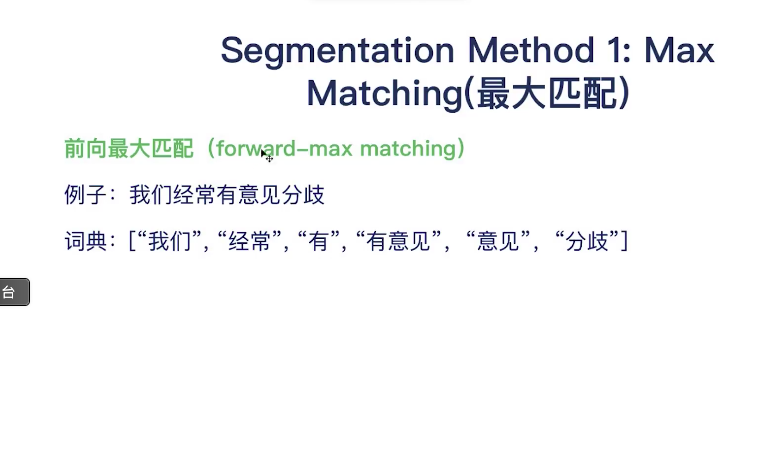

In [4]:
img_path1 = "/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP训练营笔记/图片/分词1.png"
display(Image(img_path1))

In [5]:
sentence = "NLP计算常常用于知识提取与推理"
dictionaries = {'NLP':1,'计算':1,'常常':1,'用于':1,'常常用于':1,'知识':1,'提取':1,'与':1,'推理':1}

In [6]:
def forwoard_slide(original,index_,max_len = 5):
    return original[index_:index_+max_len]
forwoard_slide(sentence,0,5)

'NLP计算'

In [7]:
def forwoard_test_word(text,dict_):
    char_len = len(text)
    for char_index in range(char_len,0,-1):
        temp_word = text[0:char_index]
        if temp_word in dict_:
            return temp_word
forwoard_test_word("用于计算",dictionaries)

'用于'

In [8]:
def forwoard_max_matching(original,max_len,dict_):
    result = []
    dict_ = list(dictionaries)
    n = len(original)
    for i in range(n):
        temp_text = forwoard_slide(original,i,max_len)
        temp_word = forwoard_test_word(temp_text,dict_)
        if temp_word != None:
            result.append(temp_word)
    return result
forwoard_max_matching(sentence,5,dictionaries)

['NLP', '计算', '常常用于', '用于', '知识', '提取', '与', '推理']

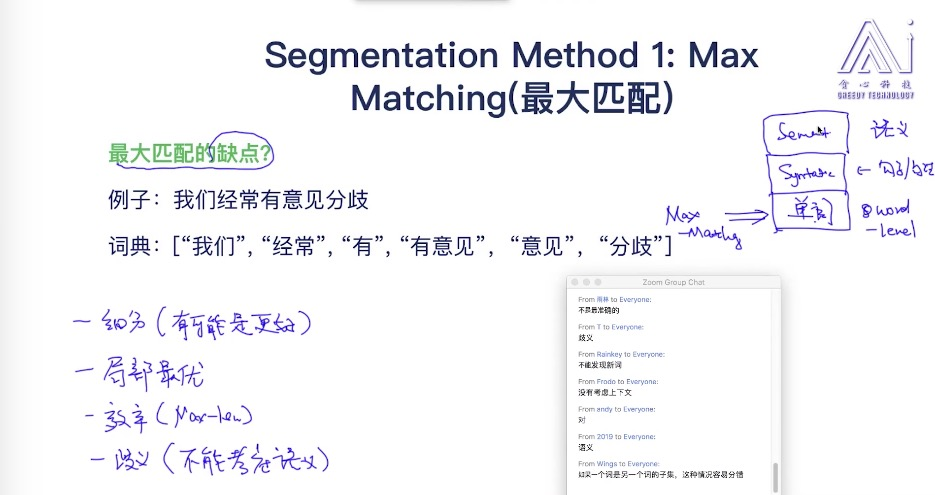

In [9]:
img_path2 = "/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP训练营笔记/图片/A206E9A5-952F-404F-8556-F31333653587.png"
display(Image(img_path2))

In [10]:
sentence[-5:]

'提取与推理'

In [11]:
def backward_slide(original,index_,max_len = 5):
    cut = index_-max_len
    if cut < 0:
        cut = 0
    return original[cut:index_]
backward_slide(sentence,16)

'提取与推理'

In [12]:
def backward_test_word(text,dict_):
    char_len = len(text)
    for char_index in range(char_len):
        temp_word = text[char_index:char_index+char_len]
        if temp_word in dict_:
            return temp_word
backward_test_word("用于计算",dictionaries)

'计算'

In [13]:
def backward_max_matching(original,max_len,dict_):
    result = []
    dict_ = list(dictionaries)
    n = len(original)
    for i in range(n-1,0,-1):
        temp_text = backward_slide(original,i)
        temp_word = backward_test_word(temp_text,dict_)
        if temp_word:
            result.append(temp_word)
    return result[::-1]
backward_max_matching(sentence,5,dictionaries)

['NLP', '计算', '常常', '常常用于', '知识', '提取', '与']

# 双路最大匹配

In [14]:
def bilateral_matching(original,max_len,word_dict,modeltype="search"):
    backward = backward_max_matching(sentence,max_len,word_dict)
    forwoard = forwoard_max_matching(sentence,max_len,word_dict)
    set_backward , set_forwoard = set(backward),set(forwoard)
    return modeltype == "search" and set_backward | set_forwoard or set_backward & set_forwoard

bilateral_matching(sentence,2,dictionaries)

{'NLP', '与', '常常', '常常用于', '推理', '提取', '用于', '知识', '计算'}

# Max Matching 代码整理

In [15]:
def forwoard_slide(original,index_,max_len = 5):
    return original[index_:index_+max_len]


def forwoard_test_word(text,dict_):
    char_len = len(text)
    for char_index in range(char_len,0,-1):
        temp_word = text[0:char_index]
        if temp_word in dict_:
            return temp_word


def forwoard_max_matching(original,max_len,dict_):
    result = []
    dict_ = list(dictionaries)
    n = len(original)
    for i in range(n):
        temp_text = forwoard_slide(original,i,max_len)
        temp_word = forwoard_test_word(temp_text,dict_)
        if temp_word != None:
            result.append(temp_word)
    return result


def backward_slide(original,index_,max_len = 5):
    cut = index_-max_len
    if cut < 0:
        cut = 0
    return original[cut:index_]


def backward_max_matching(original,max_len,dict_):
    result = []
    dict_ = list(dictionaries)
    n = len(original)
    for i in range(n-1,0,-1):
        temp_text = backward_slide(original,i)
        temp_word = backward_test_word(temp_text,dict_)
        if temp_word:
            result.append(temp_word)
    return result[::-1]


def MaxMatching(original,max_len,word_dict,modeltype="search"):
    backward = backward_max_matching(sentence,max_len,word_dict)
    forwoard = forwoard_max_matching(sentence,max_len,word_dict)
    set_backward , set_forwoard = set(backward),set(forwoard)
    return modeltype == "search" and set_backward | set_forwoard or set_backward & set_forwoard

MaxMatching(sentence,2,dictionaries)

{'NLP', '与', '常常', '常常用于', '推理', '提取', '用于', '知识', '计算'}

In [16]:
MaxMatching("NLP计算常常用于知识提取与推理",2,dictionaries)

{'NLP', '与', '常常', '常常用于', '推理', '提取', '用于', '知识', '计算'}